# Introduction
Learning about the game 'Go' was interesting. I really enjoyed this project because the game itself seems easy but I learned a little bit about the intricacies. The game is a lot more strategic than it appears. I thought of a few approaches to completing this project, but I picked the path of most learning. I feel that I gathered a few critical points and used a lot of math. I think I would like to see some more projects that are more image processing based. During this project, I utilized existing demos, chatgpt, and prior knowlege.

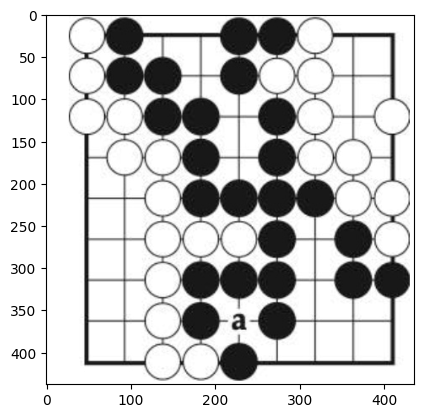

In [ ]:
import numpy as np
import cv2
import math
import random
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
im=cv2.imread('/content/go99.jpeg', cv2.IMREAD_GRAYSCALE)
from scipy.signal import convolve2d


plt.figure()
plt.imshow(im, cmap='gray')

# Another approach I considered
My first approach was based on a smaller project I made in which we find the largest circle in the image using image processing techniques. I think this approach could have worked, but houghcircle transform is more seamless and more accurate I feel. When you look at the corner intersections alone, you can see why I chose not to take this route.

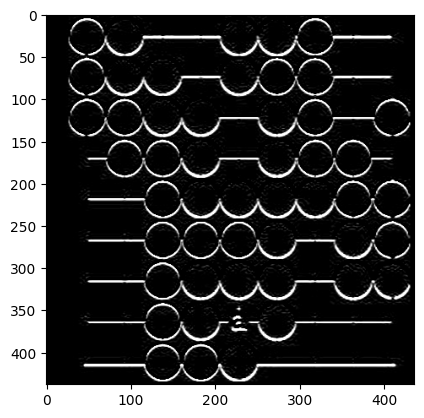

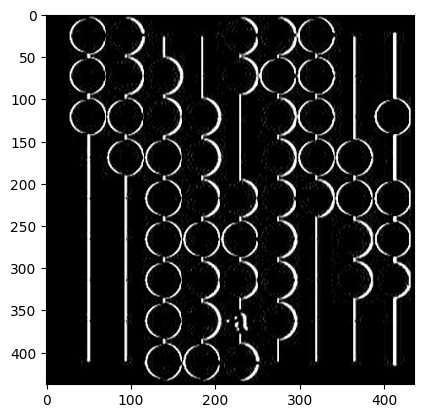

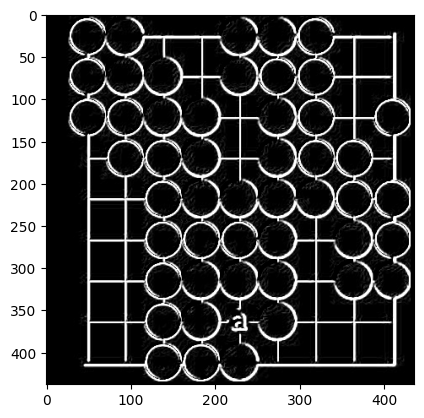

In [ ]:
horiz = np.array([
    [-1.0, 0.0, 1.0],
    [-2.0, 0.0, 2.0],
    [-1.0, 0.0, 1.0]
])
# flips the matrix for vertical detection
vert = horiz.T

Filter_vert = cv2.filter2D(im, -1, vert)
Filter_horiz = cv2.filter2D(im, -1, horiz)
plt.figure()
plt.imshow(Filter_vert,cmap='gray', vmin=0, vmax=255)
plt.figure()
plt.imshow(Filter_horiz,cmap='gray', vmin=0, vmax=255)
gradient = np.maximum(Filter_vert, Filter_horiz)
plt.figure()
plt.imshow(gradient,cmap='gray', vmin=0, vmax=255)

# Another approach I considered
This idea was also based on our project in which we found the largest circle. While I didn't continue with this idea, I think if I would have, I could gather the information of the center of the disks. I struggled a bit with the white stones so I decided to take another approach.

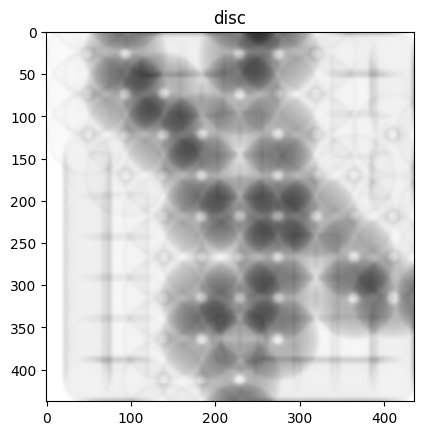

In [ ]:
center = []

# function that checks if distance between the center and the radius is true (within distance) or false
def in_circle(x,y, center_x, center_y, radius):
    distance = math.sqrt(math.pow(x-center_x,2)+math.pow(y-center_y,2))
    return (distance < radius)

#function that checks if the circle, im1, is within the disk
def in_disk(x,y,center_x,center_y,inner_radius,outer_radius):
    return not in_circle(x,y,center_x,center_y,inner_radius) and in_circle(x,y,center_x,center_y,outer_radius)

# 100x100 disc kernel
disc_kernel = np.zeros((100,100),dtype=float)
for i in range(100):
    for j in range(100):
        if in_disk(i,j,50,50,25,30):
            disc_kernel[i][j] = 1

disc = convolve2d(im, disc_kernel, mode='same', boundary = 'symm', fillvalue=0)
disc= np.absolute(disc)
disc *= 255.0 / np.max(disc)

plt.figure()
plt.title('disc')
plt.imshow(disc, cmap='gray', vmin=0, vmax=255)

# Detecting circles
In this cell, I decided to use hough circle transform to detect the circles in the image. It detects the outline of the circle, so it doesn't matter if the circle is black or white. When I was looping through the image, I also searched for other critical information. Looking back, if there were no stones on the far left, far right, top, or bottom of the board, it may distort the detection if we were to use a different image.

Circle Centers:
(274, 266)
(364, 314)
(318, 218)
(182, 170)
(274, 120)
(410, 314)
(274, 314)
(228, 412)
(274, 170)
(318, 72)
(364, 170)
(274, 26)
(92, 26)
(228, 218)
(138, 170)
(138, 362)
(92, 170)
(274, 218)
(48, 26)
(410, 266)
(228, 26)
(318, 26)
(138, 72)
(138, 120)
(184, 314)
(184, 120)
(274, 362)
(410, 120)
(318, 120)
(92, 122)
(138, 266)
(182, 362)
(184, 218)
(364, 266)
(138, 410)
(92, 72)
(410, 218)
(228, 72)
(228, 314)
(138, 218)
(272, 72)
(48, 122)
(182, 266)
(228, 266)
(184, 410)
(140, 312)
(364, 218)
(320, 168)
(50, 74)
left, x = 48
right, x = 410
top, y = 26
bottom, y = 412


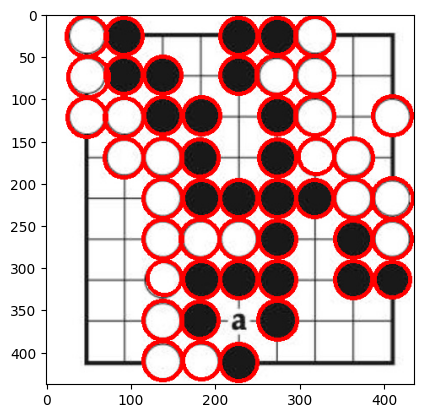

In [ ]:
# an array that stores all of the center locations
circleCenter = []
leftmost_center = None
rightmost_center = None
topmost_center = None
bottommost_center = None
min_x = float('inf')
max_x = 0
min_y = float('inf')
max_y = 0




output = cv2.cvtColor(im, cv2.COLOR_GRAY2BGR)

blurred = cv2.GaussianBlur(im, (9, 9), 2, 2)

# Hough Circle transform to detect circles
circles = cv2.HoughCircles(blurred,
                           cv2.HOUGH_GRADIENT, 1, 20,
                           param1=50, param2=30, minRadius=20, maxRadius=29)

minLeftVert = 400

# Draw the circle outlines, 'None' would mean no circles were detected
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        center = (i[0], i[1])
        #adds center location of each circle to the array
        circleCenter.append(center)

        #gathering corner information
        if center[0] < min_x:
            min_x = center[0]
            leftmost_center = center[0]
        if center[0] > max_x:
            max_x = center[0]
            rightmost_center = center[0]

        if center[1] < min_y:
            min_y = center[1]
            topmost_center = center[1]
        if center[1] > max_y:
            max_y = center[1]
            bottommost_center = center[1]


        # Circle outline
        radius = i[2]
        cv2.circle(output, center, radius, (255, 0, 0), 3)

plt.imshow(output)
print("Circle Centers:")
for center in circleCenter:
    print(center)

print('left, x =', leftmost_center)
print('right, x =', rightmost_center)
print('top, y =', topmost_center)
print('bottom, y =', bottommost_center)

# Corner coordinates
Here I printed the corner coordinates based on the data gathered from last cell. Adding the visual element confirmed that my coordinates were correct. The coner coordinates will also help me gather empty intersection information

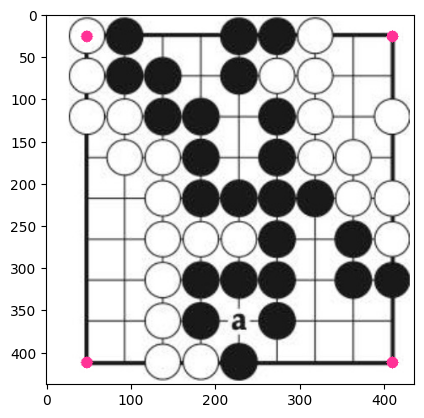

In [ ]:
import cv2
import matplotlib.pyplot as plt

color_image = cv2.cvtColor(im, cv2.COLOR_GRAY2BGR)

color = (150, 50, 255)
radius = 7
thickness = -1

cv2.circle(color_image, (leftmost_center, topmost_center), radius, color, thickness)
cv2.circle(color_image, (leftmost_center, bottommost_center), radius, color, thickness)
cv2.circle(color_image, (rightmost_center, topmost_center), radius, color, thickness)
cv2.circle(color_image, (rightmost_center, bottommost_center), radius, color, thickness)

image_rgb = cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.show()


# Storing an array with coordinates and 'black' or 'white' values
In this cell, I used the stored array values of center coordinates. Since the center coordinates are already known to be inside a circle, I grabed those center values to check if the pixel was black or white. I could check the color values of the image to see if they are 255 or 0, but I decided to add a threshold instead.

In [ ]:
black_threshold = 50
white_threshold = 205

stone_info = []

count = 0
# looping through my stored center circle coordinates
for center in circleCenter:
    x, y = center
    pixel_value = im[y, x]  # gathers the pixel value at the center location
    # added threshold in case the image values aren't exactly 255 or 0
    if pixel_value >= white_threshold:
        stone_info.append((center, 'W'))
        print(f"The Circle, {center}  --W.")
    elif pixel_value <= black_threshold:
        stone_info.append((center, 'B'))
        print(f"The Circle, {center} --B.")

The Circle, (274, 266) --B.
The Circle, (364, 314) --B.
The Circle, (318, 218) --B.
The Circle, (182, 170) --B.
The Circle, (274, 120) --B.
The Circle, (410, 314) --B.
The Circle, (274, 314) --B.
The Circle, (228, 412) --B.
The Circle, (274, 170) --B.
The Circle, (318, 72)  --W.
The Circle, (364, 170)  --W.
The Circle, (274, 26) --B.
The Circle, (92, 26) --B.
The Circle, (228, 218) --B.
The Circle, (138, 170)  --W.
The Circle, (138, 362)  --W.
The Circle, (92, 170)  --W.
The Circle, (274, 218) --B.
The Circle, (48, 26)  --W.
The Circle, (410, 266)  --W.
The Circle, (228, 26) --B.
The Circle, (318, 26)  --W.
The Circle, (138, 72) --B.
The Circle, (138, 120) --B.
The Circle, (184, 314) --B.
The Circle, (184, 120) --B.
The Circle, (274, 362) --B.
The Circle, (410, 120)  --W.
The Circle, (318, 120)  --W.
The Circle, (92, 122)  --W.
The Circle, (138, 266)  --W.
The Circle, (182, 362) --B.
The Circle, (184, 218) --B.
The Circle, (364, 266) --B.
The Circle, (138, 410)  --W.
The Circle, (92, 7

# Another approach that I considered but didn't finish
This was the beginning of a bit of my search for interceptions. I did not decide to go through with this idea as I felt I had gathered enough information to figure out the rest of the board mathematically.

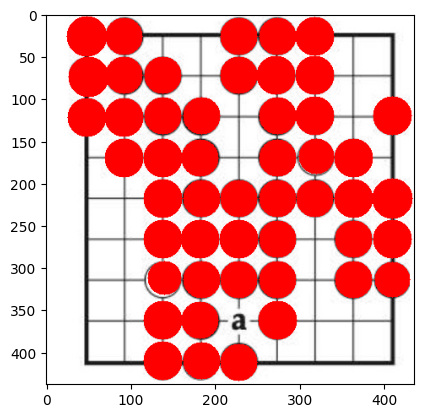

In [ ]:
output = cv2.cvtColor(im, cv2.COLOR_GRAY2BGR)

blurred = cv2.GaussianBlur(im, (9, 9), 2, 2)

# Hough Circle transform to detect circles
circles = cv2.HoughCircles(blurred,
                           cv2.HOUGH_GRADIENT, 1, 20,
                           param1=50, param2=30, minRadius=20, maxRadius=29)

minLeftVert = 400

# Draw the circle outlines, 'None' would mean no circles were detected
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        center = (i[0], i[1])
        #adds center location of each circle to the array
        circleCenter.append(center)

        # Circle outline
        radius = i[2]
        cv2.circle(output, center, radius, (255, 0, 0), -1)

# Display the image
plt.imshow(output)


# Creating a visual matrix to display the board
Here I gather empty interceptions based on my stone_info array with coordinates and with color info. I relied heavily on chatgpt for this portion as I was trying to implement the logic into code. For each stored stone characteristic, the row and column in which this exists is calculated using the edges of the board and distance coordinates. Since the coordinates are a very specific pixel, there is also a round function so that the value will round to the nearest crosspoint, even if it is off by a couple pixel values.

In [ ]:
board_size = 9

# Calculate spacing between intersections
horizontal_spacing = (rightmost_center - leftmost_center) / (board_size - 1)
vertical_spacing = (bottommost_center - topmost_center) / (board_size - 1)

# Initialize the board grid
board = [['_' for _ in range(board_size)] for _ in range(board_size)]

for (x, y), color in stone_info:
    col = round((x - leftmost_center) / horizontal_spacing)
    row = round((y - topmost_center) / vertical_spacing)
    if 0 <= col < board_size and 0 <= row < board_size:
        if color == 'B':
            board[row][col] = 'b'
        elif color == 'W':
            board[row][col] = 'w'


# Count empty intersections
empty_intersections = sum(row.count('_') for row in board)

print(f"Empty Intersections: {empty_intersections}")
for i in board: print(i)


Empty Intersections: 32
['w', 'b', '_', '_', 'b', 'b', 'w', '_', '_']
['w', 'b', 'b', '_', 'b', 'w', 'w', '_', '_']
['w', 'w', 'b', 'b', '_', 'b', 'w', '_', 'w']
['_', 'w', 'w', 'b', '_', 'b', 'w', 'w', '_']
['_', '_', 'w', 'b', 'b', 'b', 'b', 'w', 'w']
['_', '_', 'w', 'w', 'w', 'b', '_', 'b', 'w']
['_', '_', 'w', 'b', 'b', 'b', '_', 'b', 'b']
['_', '_', 'w', 'b', '_', 'b', '_', '_', '_']
['_', '_', 'w', 'w', 'b', '_', '_', '_', '_']


# Finding the game winner
Since Go board game is based on not only the stones placed on the board, but what area those stones engulf, I used my previous matrix that visually displays the black, white, and blank intersections on the board. I took a 'nearest neighbors' approach to decipher if the blank spaces on the board consist of 'white' or 'black' territory.

In [ ]:
whiteCount = 0
blackCount = 0
def is_valid_position(row, col, board_size):
    return 0 <= row < board_size and 0 <= col < board_size

def get_neighbors(row, col, board):
    neighbors = []
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # top, bottom, left, right
    for dr, dc in directions:
        new_row, new_col = row + dr, col + dc
        if is_valid_position(new_row, new_col, len(board)):
            neighbors.append(board[new_row][new_col])
    return neighbors

#Is the empty space black or white?
for row in range(board_size):
    for col in range(board_size):
        if board[row][col] == '_':
            neighbors = get_neighbors(row, col, board)
            if all(n in ['b', '_'] for n in neighbors):
                board[row][col] = 'b'
            elif all(n in ['w', '_'] for n in neighbors):
                board[row][col] = 'w'

#keeping the count of black and white stones
for row in range(board_size):
    for col in range(board_size):
        if board[row][col] == 'b':
          blackCount += 1
        elif board[row][col] == 'w':
          whiteCount += 1

# Print the updated board
for row in board:
    print(' '.join(row))

print('Black count :', blackCount)
print('White count :', whiteCount)

if(blackCount > whiteCount):
  print('Black Wins!')
elif(whiteCount > blackCount):
  print('White Wins!')
elif(whiteCount == blackCount):
  print('The game is tied')


w b b b b b w w w
w b b b b w w w w
w w b b b b w w w
w w w b b b w w w
w w w b b b b w w
w w w w w b b b w
w w w b b b b b b
w w w b b b b b b
w w w w b b b b b
Black count : 40
White count : 41
White Wins!
